Mixture Equilibrium
---
Important Libraries

In [12]:
import numpy as np
from scipy.optimize import fsolve

# Problem 1
(a) Determine the total pressure and the composition of the vapor in equilibrium
with a liquid mixture of 50 mol% ethanol, 30 mol% 1-propanol, and 20 mol% 2-
butanol at 60 $^o$C. Assume Raoult’s law behavior.


In [13]:
# [ethanol, 1-propanol, 2-butanol]
x = [0.5, 0.3, 0.2]                     # mol frac liquid
temp = 60 + 273.15                      # K
psat = [0.47018, 0.20338, 0.18258]      # bar

# Calculate total pressure and compositions
pres = sum([x[i]*psat[i] for i in range(len(x))])  # bar
y = [x[i]*psat[i]/pres for i in range(len(x))]

print(f"The total pressure is {pres:.4f} bar\nThe composition of the vapor is:")
print(f"y_ethanol  = {y[0]:.3f}\ny_propanol = {y[1]:.3f}\ny_butanol  = {y[2]:.3f}")

The total pressure is 0.3326 bar
The composition of the vapor is:
y_ethanol  = 0.707
y_propanol = 0.183
y_butanol  = 0.110


(b) Determine the total pressure and the composition of the liquid in equilibrium
with a vapor mixture of 50 mol% ethanol, 30 mol% 1-propanol, and 20 mol% 2-
butanol at 60 $^o$C. Assume Raoult’s law behavior.

In [14]:
# [ethanol, 1-propanol, 2-butanol]
y = [0.5, 0.3, 0.2]                     # mol frac vapor
temp = 60 + 273.15                      # K
psat = [0.47018, 0.20338, 0.18258]      # bar

# Calculate total pressure and compositions
pres = fsolve(lambda p: sum([y[i]*p/psat[i] for i in range(len(y))]) - 1,1)[0]  # bar
x = [y[i]*pres/psat[i] for i in range(len(y))]

print(f"The total pressure is {pres:.4f} bar\nThe composition of the liquid is:")
print(f"x_ethanol  = {x[0]:.3f}\nx_propanol = {x[1]:.3f}\nx_butanol  = {x[2]:.3f}")

The total pressure is 0.2752 bar
The composition of the liquid is:
x_ethanol  = 0.293
x_propanol = 0.406
x_butanol  = 0.301


# Problem 2

(a) Determine the temperature and the composition of the vapor in equilibrium
with a liquid mixture of 50 mol% ethanol, 30 mol% 1-propanol, and 20 mol% 2-
butanol at 1 atm. Assume Raoult’s law behavior.

In [15]:
# [ethanol, 1-propanol, 2-butanol]
x = [0.5, 0.3, 0.2]                     # mol frac vapor
pres = 1.01325                          # bar
Psat = lambda A,T: np.exp(A[0]+A[1]/T+A[2]*np.log(T)+A[3]*T**A[4])/100000       # bar

e_cond = [73.304, -7122.3, -7.1424,2.8853E-06, 2]
p_cond = [84.66416,-8307.24422,-8.57673,7.50905E-18,6]
b_cond = [122.552,-10236.2,-14.125,2.35591E-17,6]
psat = lambda T: [Psat(e_cond,T),Psat(p_cond,T),Psat(b_cond,T)]                 # bar

# Calculate total pressure and compositions
temp = fsolve(lambda T: sum([x[i]*psat(T)[i] for i in range(len(x))]) - pres,400)[0]  # bar
y = [x[i]*psat(temp)[i]/pres for i in range(len(x))]

print(f"The temperature is {temp:.2f} K\nThe composition of the vapor is:")
print(f"y_ethanol  = {y[0]:.3f}\ny_propanol = {y[1]:.3f}\ny_butanol  = {y[2]:.3f}")

The temperature is 359.61 K
The composition of the vapor is:
y_ethanol  = 0.683
y_propanol = 0.197
y_butanol  = 0.120


(b) Determine the temperature and the composition of the liquid in equilibrium
with a vapor mixture of 50 mol% ethanol, 30 mol% 1-propanol, and 20 mol% 2-
butanol at 1 atm. Assume Raoult’s law behavior.

In [16]:
y = [0.5, 0.3, 0.2]                     # mol frac vapor
pres = 1.01325                          # bar
Psat = lambda A,T: np.exp(A[0]+A[1]/T+A[2]*np.log(T)+A[3]*T**A[4])/100000       # bar

e_cond = [73.304, -7122.3, -7.1424,2.8853E-06, 2]
p_cond = [84.66416,-8307.24422,-8.57673,7.50905E-18,6]
b_cond = [122.552,-10236.2,-14.125,2.35591E-17,6]
psat = lambda T: [Psat(e_cond,T),Psat(p_cond,T),Psat(b_cond,T)]                 # bar

# Calculate total pressure and compositions
temp = fsolve(lambda T: sum([y[i]*pres/psat(T)[i] for i in range(len(y))]) - 1,400)[0]  # bar
x = [y[i]*pres/psat(temp)[i] for i in range(len(y))]

print(f"The temperature is {temp:.2f} K\nThe composition of the liquid is:")
print(f"x_ethanol  = {x[0]:.3f}\nx_propanol = {x[1]:.3f}\nx_butanol  = {x[2]:.3f}")

The temperature is 363.34 K
The composition of the liquid is:
x_ethanol  = 0.319
x_propanol = 0.393
x_butanol  = 0.288


# Problem 3

Perform a flash calculation for the binary system composed of 50 mol% n-butane
and 50 mol% n-pentane at 20.0$^o$C and 1.00 atm. Determine the amounts of the
vapor and liquid phases and the compositions of each. Assume Raoult’s law
behavior.

In [17]:
# [n-butane, n-pentane]
z = [0.5, 0.5]
temp = 273.15 + 20      # K
pres = 1.01325          # bar

b_cond = [66.343,-4363.2,-7.046,9.4509E-06, 2]
p_cond = [78.741,-5420.3,-8.8253,9.6171E-06,2]
psat = lambda T: [Psat(b_cond,temp),Psat(p_cond,temp)]      # bar

def comps(inp):
    X1,Y1 = inp
    x = [X1, 1 - X1]
    y = [Y1, 1 - Y1]
    eq1 = sum([x[0]*psat(temp)[0], x[1]*psat(temp)[1]]) - pres
    eq2 = sum([y[i]*pres/psat(temp)[i] for i in range(len(z))]) - 1
    return eq1,eq2

x,y = fsolve(comps,[.5,.5])
x = [x, 1-x]; y = [y, 1-y]
print(f"The liquid compositions are as follows:\nx_butane = {x[0]:.4f}\tx_pentane = {x[1]:.4f}\n")
print(f"The vapor compositions are as follows:\ny_butane = {y[0]:.4f}\ty_pentane = {y[1]:.4f}\n")

The liquid compositions are as follows:
x_butane = 0.2954	x_pentane = 0.7046

The vapor compositions are as follows:
y_butane = 0.6064	y_pentane = 0.3936



Complex Vapor Liquid Equilibrium
---
Important Libraries

In [18]:
import numpy as np
from scipy.optimize import fsolve
from IPython.display import Image, display

# Problem 1
An equimolar mixture of acetone (1), ethanol (2), and ethyl ether (3) is at $55^{\circ}C$.
Liquid densities are 0.790, 0.789, and 0.713 g/cm3, respectively. Vapor-phase
behavior may be taken as ideal. Wilson coefficients at $55^{\circ} C$ are listed below:<br>
Mixture $\Lambda12\> \Lambda21$<br>
12 0.30771 1.20101<br>
13 0.49880 0.86494<br>
23 0.29207 0.77045

## Part a
Find the bubblepoint and dewpoint pressures and compositions using Python.

In [19]:
# [acetone, ethanol, ethyl ether]
temp = 273.15 + 55
rho = [0.790, 0.789, 0.713]
z = [1/3, 1/3, 1/3]
Lambda = [[1, 0.30771, 0.49880],
          [1.20101, 1, 0.29207],
          [0.86494, 0.77045, 1]]

def ACγ(x):
    lnγi = [0, 0, 0]
    for i in range(len(rho)):
        first = sum([x[j] * Lambda[i][j] for j in range(len(x))])
        sec = sum([(x[k]*Lambda[k][i])/sum([x[j]*Lambda[k][j] for j in range(len(x))]) for k in range(len(x))])
        lnγi[i] = -np.log(first) + 1 - sec
    return [np.exp(lnγi[i]) for i in range(len(x))]

Psat = lambda A,T: np.exp(A[0]+A[1]/T+A[2]*np.log(T)+A[3]*T**A[4])/100000   # bar
a_cond = [57.9467,-5355.27,-5.21058,1.24493E-14,5]
e_cond = [73.304, -7122.3, -7.1424, 2.8853E-06, 2]
ee_cond= [136.9,  -6954.3, -19.254, 0.024508,   1]
psat = lambda T: [Psat(a_cond,T),Psat(e_cond,T),Psat(ee_cond,temp)]         # bar

# Calculate bubble point as if given comps were liquid fractions
bp_g = ACγ(z)
bp_P = fsolve(lambda P: sum([z[i]*P/(psat(temp)[i]*bp_g[i]) for i in range(len(z))]) - 1, 1)[0]
bp_y = [z[i]*bp_P/(psat(temp)[i]*bp_g[i]) for i in range(len(z))]

# Calculate dew point as if given comps were vapor fractions
dp_P = lambda x: sum([z[i]*ACγ(x)[i]*psat(temp)[i] for i in range(len(z))])
def dpPx(inp):
    P = inp[0]
    x = inp[1:]
    eq1 = dp_P(x) - P
    eq2 = [0,0,0]
    for i in range(len(x)):
        eq2[i] = z[i]*ACγ(x)[i]*psat(temp)[i] - x[i]*dp_P(x)
    return [eq1,eq2[0],eq2[1],eq2[2]]
guess = [1,1/3,1/3,1/3]
ans = fsolve(dpPx,guess)
dp_p= ans[0]
dp_x= ans[1:]

print(f"The dew point pressure is: {bp_P:.4f} bar")
print(f"The composition is as follows:\ny_acetone = {bp_y[0]:.3f}\ny_ethanol = {bp_y[1]:.3f}\ny_ethylether = {bp_y[2]:.3f}\n")
print(f"The bubble point pressure is: {dp_p:.4f} bar")
print(f"The composition is as follows:\ny_acetone = {dp_x[0]:.3f}\ny_ethanol = {dp_x[1]:.3f}\ny_ethylether = {dp_x[2]:.3f}")

The dew point pressure is: 0.9446 bar
The composition is as follows:
y_acetone = 0.280
y_ethanol = 0.610
y_ethylether = 0.111

The bubble point pressure is: 1.4142 bar
The composition is as follows:
y_acetone = 0.286
y_ethanol = 0.156
y_ethylether = 0.558


## PFD

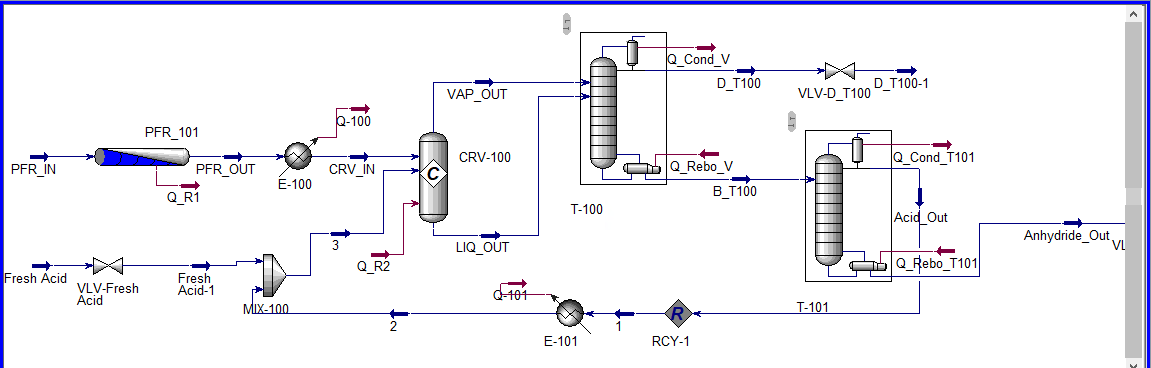

In [20]:
display(Image("HW17_PFD.png"))